In [2]:
#code to mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the neccessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
#from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

Load the data set.

DIABETIC DATASET


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/diabetes.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.shape


(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop_duplicates(inplace=True)
df.shape

(768, 9)

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm = MinMaxScaler()

df_normalized = pd.DataFrame(mm.fit_transform(df), columns=df.columns)
df_normalized

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [13]:
#using z-score scaling
ss = StandardScaler()
df_standardized = pd.DataFrame(ss.fit_transform(df), columns=df.columns)
df_standardized

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


In [14]:

x = pd.DataFrame(data = df, columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])

y = pd.DataFrame(data = df, columns = ["Outcome"])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#x → Features (input data)
#y → Target variable (labels/output)
#test_size=0.2 → 20% of the data will be used for testing, and 80% for training.
#random_state=42 → Ensures the same split every time (for reproducibility).

In [16]:
print("Training size:", x_train.shape)
print("Testing size:", x_test.shape)

Training size: (614, 8)
Testing size: (154, 8)


In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)
model.score(x_train,y_train)


0.7703583061889251

For this dataset we have not used linear regression because this dataset works with classification as we have to predict that the person is diabetc or not

In [18]:
#Used for: Continuous (numeric) data that follows a normal (Gaussian) distribution.
#Example: Predicting a person's weight based on height.
from sklearn.naive_bayes import GaussianNB
model =GaussianNB()
model.fit(x_train, y_train)
model.score(x_test, y_test)
model.score(x_train,y_train)

0.752442996742671

In [19]:
#Used for: Discrete (count-based) data like word frequency in text.
#Example: Classifying emails as spam or not spam based on word occurrences.
from sklearn.naive_bayes import MultinomialNB
model =MultinomialNB()
model.fit(x_train, y_train)
model.score(x_test, y_test)
model.score(x_train,y_train)

0.6042345276872965

In [20]:
#Used for: Binary data (yes/no, true/false, 0/1 features).
#Example: Checking if an email contains certain words (yes/no) to classify spam.
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train, y_train)
model.score(x_test, y_test)
model.score(x_train,y_train)

0.6482084690553745

Classification report


In [21]:
#classification report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.99      0.79        99
           1       0.75      0.05      0.10        55

    accuracy                           0.66       154
   macro avg       0.70      0.52      0.44       154
weighted avg       0.69      0.66      0.54       154



What is model.predict()?

model.predict() is a method in scikit-learn used to generate predictions from a trained machine learning model.

How It Works:

After training the model using model.fit(x_train, y_train), we use model.predict(x_test) to get the model's predicted values for new (unseen) data.
x_test is the input features, and model.predict(x_test) returns the corresponding predictions.


In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.6558441558441559


**K Means Clustering**-Manual implementation

Clustering Accuracy: 73.96%


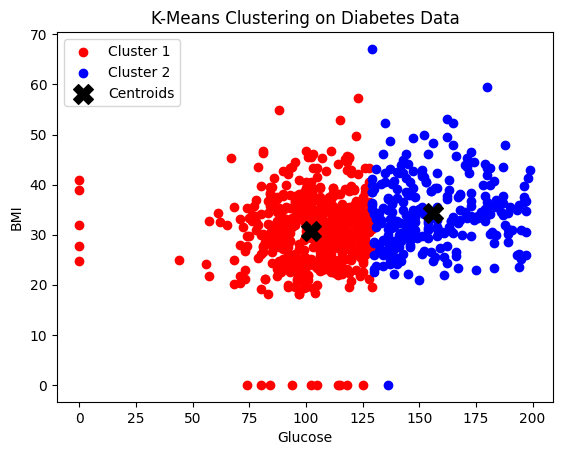

In [24]:
X = df[['Glucose', 'BMI']].values  # Two features for easy 2D clustering
y = df['Outcome'].values
# Initialize parameters
k = 2  # two clusters
max_iters = 20
np.random.seed(42)

# Randomly choose initial centroids
initial_indices = np.random.choice(X.shape[0], k, replace=False)
centroids = X[initial_indices]

# K-Means clustering loop
for i in range(max_iters):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    clusters = np.argmin(distances, axis=1)
    centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])

# Map cluster labels to actual classes
cluster_to_label = {}
for cluster_id in range(k):
    labels_in_cluster = y[clusters == cluster_id]
    majority_label = np.bincount(labels_in_cluster).argmax()
    cluster_to_label[cluster_id] = majority_label

# Predict and calculate accuracy
predicted_labels = np.array([cluster_to_label[cluster] for cluster in clusters])
accuracy = accuracy_score(y, predicted_labels)
print(f"Clustering Accuracy: {accuracy * 100:.2f}%")

# Plot clusters
colors = ['red', 'blue']
for j in range(k):
    plt.scatter(X[clusters == j, 0], X[clusters == j, 1], c=colors[j], label=f'Cluster {j+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='black', s=200, label='Centroids')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('K-Means Clustering on Diabetes Data')
plt.legend()
plt.show()


========== K-Means Clustering Report ==========
Overall Clustering Accuracy: 73.96%

Confusion Matrix:
[[401  99]
 [101 167]]


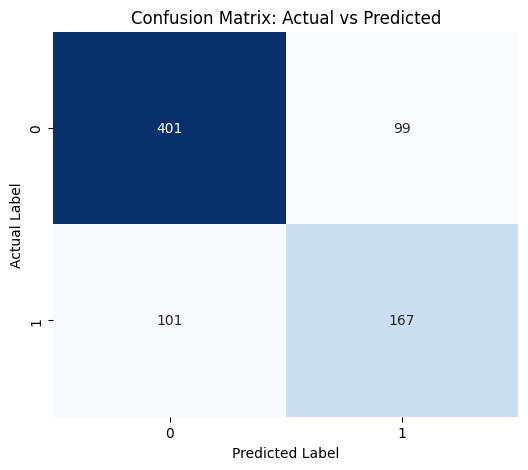

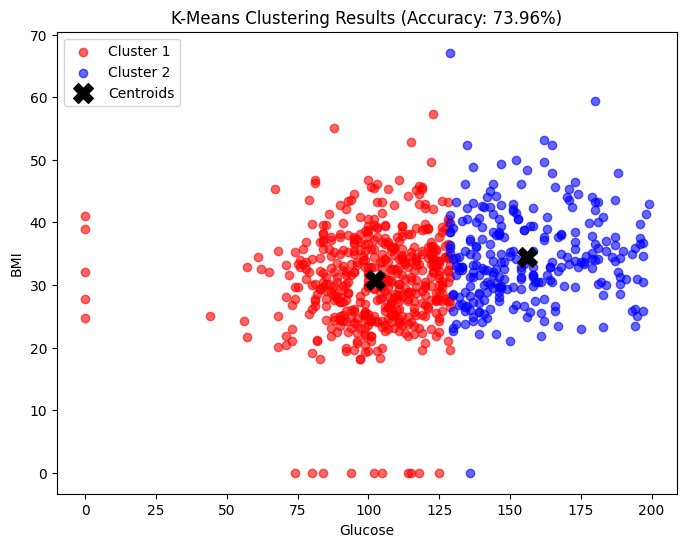

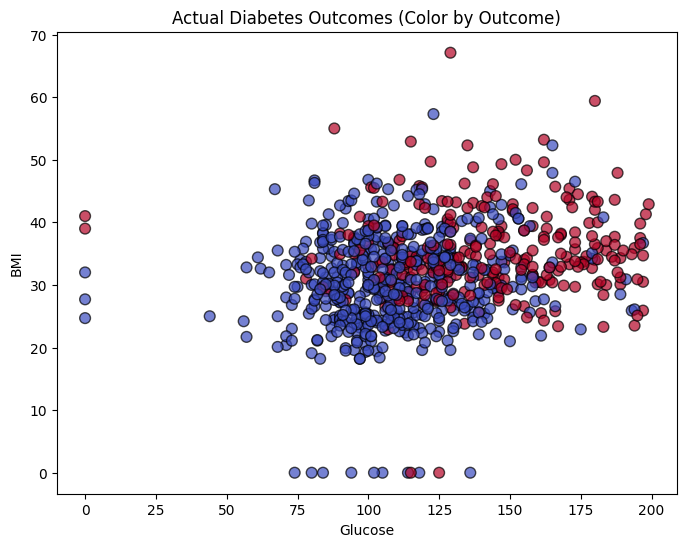

In [28]:
X = df[['Glucose', 'BMI']].values  # Using two features for visualization
y = df['Outcome'].values

# Initialize K-means parameters
k = 2
max_iters = 20
np.random.seed(42)

# Randomly choose initial centroids
initial_indices = np.random.choice(X.shape[0], k, replace=False)
centroids = X[initial_indices]

# K-Means clustering loop
for i in range(max_iters):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    clusters = np.argmin(distances, axis=1)
    centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])

# Map cluster number to the majority actual outcome
cluster_to_label = {}
for cluster_id in range(k):
    labels_in_cluster = y[clusters == cluster_id]
    majority_label = np.bincount(labels_in_cluster).argmax()
    cluster_to_label[cluster_id] = majority_label

# Predict outcomes based on clusters
predicted_labels = np.array([cluster_to_label[cluster] for cluster in clusters])

# Calculate accuracy
accuracy = accuracy_score(y, predicted_labels)

# Print results
print("========== K-Means Clustering Report ==========")
print(f"Overall Clustering Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
cm = confusion_matrix(y, predicted_labels)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Actual vs Predicted')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Scatter plot visualization of clustering
plt.figure(figsize=(8,6))
for cluster_id, color in zip(range(k), ['red', 'blue']):
    plt.scatter(X[clusters == cluster_id, 0], X[clusters == cluster_id, 1],
                c=color, label=f'Cluster {cluster_id+1}', alpha=0.6)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title(f'K-Means Clustering Results (Accuracy: {accuracy * 100:.2f}%)')
plt.legend()
plt.show()

# Compare actual outcomes and cluster assignments visually
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=60, edgecolor='k', alpha=0.7)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Actual Diabetes Outcomes (Color by Outcome)')
plt.show()


**K Means Clustering**:-Using built-in library

In [27]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

model.fit(x_train, y_train)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.6558441558441559


In [ ]:
X = df[['Glucose', 'BMI']].values  # Two features for 2D visualization

# Step 3: Initialize parameters
k = 2  # We will form 2 clusters
max_iters = 20
np.random.seed(42)

# Step 4: Randomly select initial centroids from the dataset
initial_indices = np.random.choice(X.shape[0], k, replace=False)
centroids = X[initial_indices]

# Step 5: Start K-means loop
for i in range(max_iters):
    # Step 5a: Calculate distance from each point to each centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

    # Step 5b: Assign clusters
    clusters = np.argmin(distances, axis=1)

    # Step 5c: Recalculate centroids
    new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])

    # Step 5d: Update centroids
    centroids = new_centroids

# Step 6: Visualize clusters
colors = ['red', 'blue']
for j in range(k):
    plt.scatter(X[clusters == j, 0], X[clusters == j, 1], c=colors[j], label=f'Cluster {j+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='black', s=200, label='Centroids')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('K-Means Clustering on Diabetes Dataset')
plt.legend()
plt.show()